In [209]:
import pickle
import re
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from rl.fuzzing_action import FuzzingAction

plt.style.use("default")
sns.set()

In [210]:
data_folder_names = [
    # "2023-06-17T13:28:.471488_baseline",
    # "2023-06-16T23:18:.282375_baseline",
    # "2023-06-20T06:37:.270395_baseline",
    # "2023-06-20T02:21:.152992_baseline",
    # "2023-06-20T22:43:.174807_baseline",
    # "2023-06-21T03:39:.120400_baseline",
    # "2023-06-19T14:00:.768497",
    "2023-06-19T14:48:.793014",
    # "2023-06-19T22:16:.955213",
    # "2023-06-19T22:58:.025511",
    # "2023-06-18T14:11:.410515",
    # "2023-06-18T14:11:.664869",
    # "2023-06-18T22:20:.078248",
    # "2023-06-19T03:30:.985346",
    # "2023-06-17T18:20:.073534",
    # "2023-06-20T16:33:.711809",
    # "2023-06-20T16:38:.514775"
    # "2023-06-21T04:52:.430666",
    # "2023-06-19T22:16:.955213",
    # "2023-06-21T00:57:.789686"
]
# smart_folder_name = "2023-06-15T12:38:.323908"
# smart_interesting_folder = Path(f"../corpus/interesting/{smart_folder_name}")
data_labels = [
    # "Baseline 1",
    # "Baseline 1",
    # "Baseline 2",
    # "Baseline 3",
    # "Baseline 4",
    # "Random",
    "Final 1",
    # "Final 2",
    # "Non-Pretrained",
    # "Pretrained"
    # "Smart (Small Replay)",
    # "Smart (Big Replay)",
    # "Replay memory: 75000",
    # "Replay memory: 100000",
    # "Small LR",
    # "Big LR",
    # "1",
    # "2"
]

data_folders = [Path(f"../data/{name}") for name in data_folder_names]

# smart_files = list(smart_folder.rglob("*.pkl"))
# baseline_files = list(baseline_folder.rglob("*.pkl"))

step_re = r"run_data_(\d+).pkl"

latest_steps = []
for folder in data_folders:
    files = list(folder.rglob("*.pkl"))
    run_data_file = max(files, key=lambda x: x.stat().st_mtime)
    step = int(re.match(step_re, run_data_file.name).group(1))
    latest_steps.append(step)

latest_step = min(latest_steps)


num_baselines = 3

for i in range(num_baselines):
    latest_steps[i] = min(latest_steps[i], max(latest_steps[num_baselines:]))

print(latest_steps)
latest_steps = [400000, 400000, 400000, 400000, 400000]
# latest_steps = [50000, 50000]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1093746/4041077902.py", line 68, in <module>
    latest_steps[i] = min(latest_steps[i], max(latest_steps[num_baselines:]))
                                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: max() arg is an empty sequence

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packages/IPython/core/ultr

In [211]:
run_data = []

for folder, step in zip(data_folders, latest_steps):
    with open(folder / f"run_data_{step}.pkl", "rb") as f:
        run_data.append(pickle.load(f))

In [212]:
print(run_data[0].keys())

dict_keys(['episode_actions', 'episode_rewards', 'episode_coverage', 'execution_coverage', 'current_coverage', 'total_steps', 'total_executions', 'failed_actions', 'running_time', 'losses'])


In [213]:
# print("Average optimization time:", np.mean(run_data[0]["optimization_times"]))
# print("Average action time:", np.mean(run_data[0]["action_times"]))
# print("Average execution time:", np.mean(run_data[0]["exec_times"]))
# print("Average code generation time:", np.mean(run_data[0]["code_gen_times"]))

In [214]:
# fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 14))

# sns.lineplot(x=np.arange(len(run_data[0]["optimization_times"])), y=run_data[0]["optimization_times"], ax=ax[0, 0])
# sns.lineplot(x=np.arange(len(run_data[0]["action_times"])), y=run_data[0]["action_times"],  ax=ax[0, 1])
# sns.lineplot(x=np.arange(len(run_data[0]["exec_times"])), y=run_data[0]["exec_times"],  ax=ax[1, 0])
# sns.lineplot(x=np.arange(len(run_data[0]["code_gen_times"])), y=run_data[0]["code_gen_times"], ax=ax[1, 1])

# ax[0, 0].set_title("Optimization")
# ax[0, 1].set_title("Action")
# ax[1, 0].set_title("Execution")
# ax[1, 1].set_title("Code Generation")

# ax[0, 0].set_xlabel("Step")
# ax[0, 1].set_xlabel("Step")
# ax[1, 0].set_xlabel("Number of executions")
# ax[1, 1].set_xlabel("Number of code generations")

# plt.figure(figsize=(10, 5))
# sns.lineplot(x=np.arange(len(run_data[0]["optimization_times"])), y=run_data[0]["optimization_times"], label="Optimization")

# plt.figure(figsize=(10, 5))
# sns.lineplot(x=np.arange(len(run_data[0]["action_times"])), y=run_data[0]["action_times"], label="Action")

# plt.figure(figsize=(10, 5))
# sns.lineplot(x=np.arange(len(run_data[0]["exec_times"])), y=run_data[0]["exec_times"], label="Execution")

# plt.figure(figsize=(10, 5))
# sns.lineplot(x=np.arange(len(run_data[0]["code_gen_times"])), y=run_data[0]["code_gen_times"], label="Code Generation")

In [215]:
# time_coverage_data = []

# for folder, final_step in zip([data_folders[0], data_folders[1]], latest_steps):
#     time_coverage = []

#     for step in range(1000, final_step + 1, 1000):
#         print(step)
#         with open(folder / f"run_data_{step}.pkl", "rb") as f:
#             step_run_data = pickle.load(f)

#         time_coverage.append((int(step_run_data["running_time"].seconds/60), step_run_data["current_coverage"]))
#     time_coverage_data.append(time_coverage)

In [216]:
# plt.figure()
# sns.lineplot(
#     x=[x[0] for x in time_coverage_data[0]],
#     y=[x[1] for x in time_coverage_data[0]],
#     label=data_labels[0],
# )
# sns.lineplot(
#     x=[x[0] for x in time_coverage_data[1]],
#     y=[x[1] for x in time_coverage_data[1]],
#     label=data_labels[1],
# )

# plt.xlabel("Time (minutes)")
# plt.ylabel("Coverage (%)")
# plt.legend()

In [217]:
summed_rewards = [[sum(episode) for episode in r["episode_rewards"]] for r in run_data]
episode_lengths = [[len(episode) for episode in r["episode_actions"]] for r in run_data]

df_data = {
    "Label": data_labels,
    "Running time": [data["running_time"] for data in run_data],
    "Total steps": [data["total_steps"] for data in run_data],
    "Total executions": [data["total_executions"] for data in run_data],
    "Final coverage": [f"{data['current_coverage']:.5%}" for data in run_data],
    "Number of episodes": [len(data["episode_rewards"]) for data in run_data],
    "Average episode reward": [f"{np.mean(rewards):.2f}" for rewards in summed_rewards],
    "Average episode length": [
        f"{np.mean(lengths):.2f}" for lengths in episode_lengths
    ],
}

print(df_data)
df = pd.DataFrame(df_data)

display(df)
# print("Labels: " + ", ".join(data_labels))
# print("Running times: " + ", ".join())
# print("Total steps: " + ", ".join([str(data["total_steps"]) for data in run_data]))
# print("Total executions: " + ", ".join([str(data["total_executions"]) for data in run_data]))
# print("Final coverage: " + ", ".join([f"{data['current_coverage']:.5%}" for data in run_data]))
# print("Number of episodes: " + ", ".join([str(len(data["episode_rewards"])) for data in run_data]))
# print(f"Average episode reward: "+ ", ".join([f"{np.mean(rewards):.2f}" for rewards in summed_rewards]))
# print("Average episode length: " + ", ".join([f"{np.mean(lengths):.2f}" for lengths in episode_lengths]))

{'Label': ['Final 1'], 'Running time': [datetime.timedelta(seconds=44297, microseconds=29584)], 'Total steps': [417000], 'Total executions': [301482], 'Final coverage': ['15.89723%'], 'Number of episodes': [10033], 'Average episode reward': ['4.68'], 'Average episode length': ['41.56']}


,Label,Running time,Total steps,Total executions,Final coverage,Number of episodes,Average episode reward,Average episode length
0,Final 1,0 days 12:18:17.029584,417000,301482,15.89723%,10033,4.68,41.56


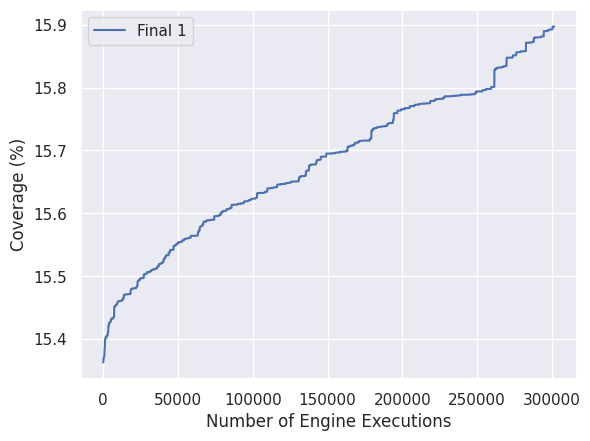

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1093746/283202953.py", line 35, in <module>
    episodes = min([len(data["episode_rewards"]) for data in run_data[num_baselines:]])
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: min() arg is an empty sequence

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packag

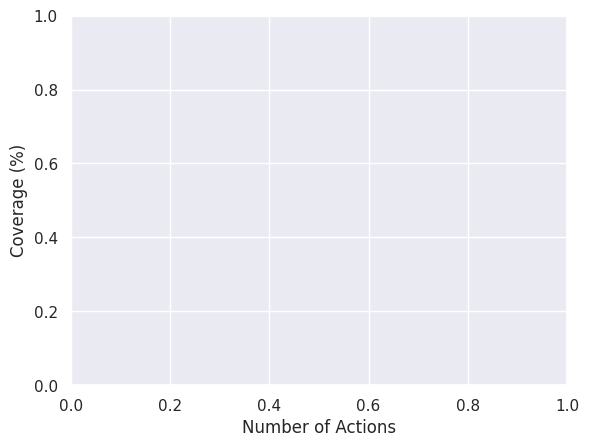

In [218]:
execs = []
actions = []
coverages = []

for data in run_data:
    run_execs = []
    run_actions = []
    run_coverage = []

    for (execution, num_actions), coverage in data["execution_coverage"].items():
        run_execs.append(execution)
        run_actions.append(num_actions)
        run_coverage.append(coverage * 100)

    execs.append(run_execs)
    actions.append(run_actions)
    coverages.append(run_coverage)

plt.figure()
plt.xlabel("Number of Engine Executions")
plt.ylabel("Coverage (%)")
# plt.title("Coverage vs. Number of JavaScript Engine Executions")

for i, label in enumerate(data_labels):
    sns.lineplot(x=execs[i], y=coverages[i], label=label)

plt.legend(loc="upper left")
plt.show()


plt.xlabel("Number of Actions")
plt.ylabel("Coverage (%)")
# plt.title("Coverage vs. Total Number of Actions")

episodes = min([len(data["episode_rewards"]) for data in run_data[num_baselines:]])

fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
ax[0].set_xlabel("Number of Actions")
ax[0].set_ylabel("Coverage (%)")

ax[1].set_xlabel("Episode number")
ax[1].set_ylabel("Episode Reward")


for i, label in enumerate(data_labels):
    sns.lineplot(x=actions[i], y=coverages[i], label=label, ax=ax[0])
    sns.lineplot(
        x=np.arange(len(summed_rewards[i]))[:episodes:6],
        y=summed_rewards[i][:episodes:6],
        label=label,
        ax=ax[1],
    )

ax[1].set_ylim(-100, 100)
ax[1].axhline(y=0, color="r", linestyle="-")


plt.legend(loc="upper left")
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:2

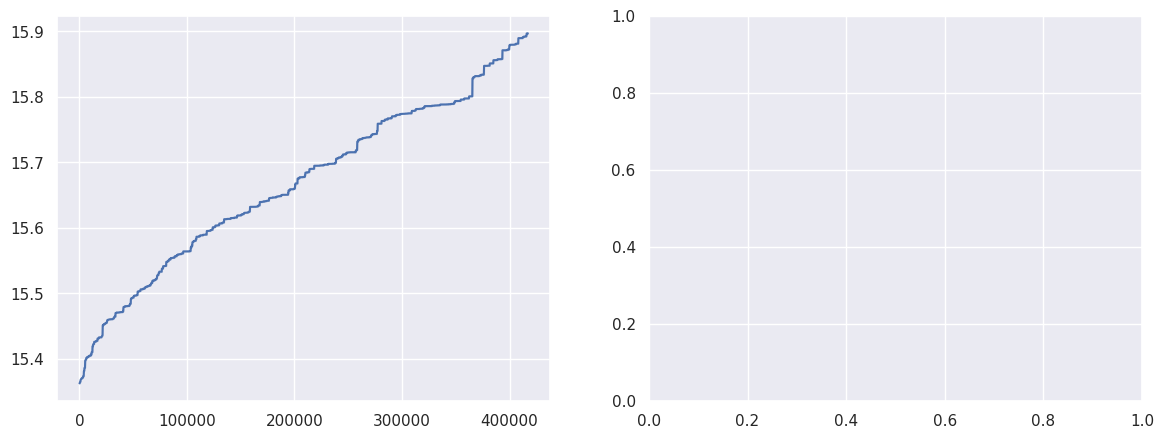

In [219]:
mean_1 = np.mean(np.array(coverages[0:3]), axis=0).squeeze()
std_1 = np.std(np.array(coverages[0:3]), axis=0).squeeze()
mean_2 = np.mean(np.array(coverages[3:5]), axis=0).squeeze()
std_2 = np.std(np.array(coverages[3:5]), axis=0).squeeze()

fig, axs = plt.subplots(ncols=2, figsize=(14, 5))


axs[0].plot(actions[0], mean_1, "b-", label="Random")
axs[0].fill_between(actions[0], mean_1 - std_1, mean_1 + std_1, color="b", alpha=0.2)
axs[0].plot(actions[0], mean_2, "r--", label="DDQN")
axs[0].fill_between(actions[0], mean_2 - std_2, mean_2 + std_2, color="r", alpha=0.2)

axs[0].legend(title="Agent Type")

# plt.title('Coverage vs. Total Number of Steps')
axs[0].set_xlabel("Number of Steps")
axs[0].set_ylabel("Coverage (%)")
# ax.tick_params(axis='both', which='major', labelsize=10)
axs[0].tick_params(axis="both", which="major", labelsize=9)

axs[1].plot(
    np.arange(len(summed_rewards[0]))[:episodes:5],
    summed_rewards[0][:episodes:5],
    "b-",
    label="Random",
)
axs[1].plot(
    np.arange(len(summed_rewards[3]))[:episodes:5],
    summed_rewards[3][:episodes:5],
    "r-",
    label="DDQN",
)

axs[1].set_ylim(-100, 100)
axs[1].axhline(y=0, color="r", linestyle="-")
axs[1].legend(title="Agent Type")

# plt.title('Coverage vs. Total Number of Steps')
axs[1].set_xlabel("Episode Number")
axs[1].set_ylabel("Episode Reward")
# ax.tick_params(axis='both', which='major', labelsize=10)
axs[1].tick_params(axis="both", which="major", labelsize=9)


plt.show()

In [220]:
# (mean_2[-1] - corpus["total_coverage"].coverage() * 100)/(mean_1[-1] - corpus["total_coverage"].coverage() * 100)

In [221]:
# corpus["total_coverage"].coverage()

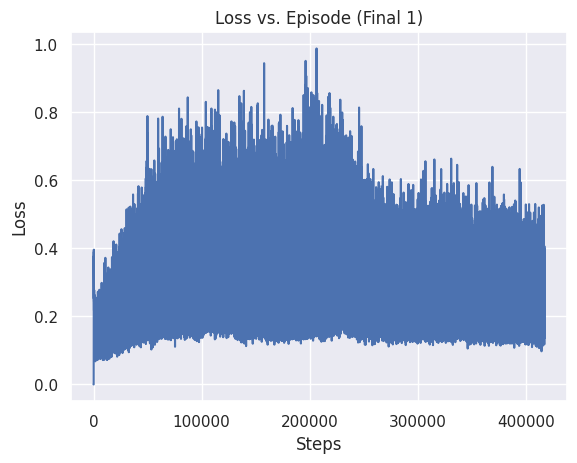

In [222]:
for i, label in enumerate(data_labels):
    if "losses" in run_data[i]:
        plt.figure()
        ax = sns.lineplot(
            x=np.arange(len(run_data[i]["losses"])),
            y=run_data[i]["losses"],
        )
        ax.set(xlabel="Steps", ylabel="Loss", title=f"Loss vs. Episode ({label})")
        # ax.set_ylim(bottom=0, top=2)

In [223]:
# for action in FuzzingAction:
#     smart_episode_actions_by_type = [
#         x[1] for x in smart_episode_actions if x[0] == action
#     ]
#     baseline_episode_actions_by_type = [
#         x[1] for x in baseline_episode_actions if x[0] == action
#     ]

#     smart_action_node_type_counts = Counter(smart_episode_actions_by_type)
#     baseline_action_node_type_counts = Counter(baseline_episode_actions_by_type)

#     smart_action_node_type_counts = pd.DataFrame(
#         smart_action_node_type_counts.items(), columns=["node_type", "count"]
#     )
#     baseline_action_node_type_counts = pd.DataFrame(
#         baseline_action_node_type_counts.items(), columns=["node_type", "count"]
#     )

#     # Plot the distribution of actions by node type using seaborn
#     plt.figure(figsize=(15, 5))
#     ax = sns.barplot(x="node_type", y="count", data=smart_action_node_type_counts)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#     ax.set(xlabel="Node Type", ylabel="Count")
#     plt.title(f"Smart Fuzzing Action Distribution for {action}")

       0        name
0  76419     Replace
2   1321      Remove
4   4670     Move Up
7   2966  Move Right
6   2898   Move Left
5   8523   Move Down
3   1080      Modify
8    555         End
1   1568         Add
{'Identifier': 4823, 'LabeledStatement': 150, 'ForStatement': 5810, 'Program': 3511, 'FunctionDeclaration': 10491, 'SwitchStatement': 384, 'ExpressionStatement': 31401, 'DoWhileStatement': 422, 'SwitchCase': 360, 'WithStatement': 463, 'CallExpression': 4773, 'BlockStatement': 2107, 'LogicalExpression': 144, 'IfStatement': 2294, 'Literal': 2342, 'UnaryExpression': 3377, 'ForOfStatement': 437, 'VariableDeclaration': 10229, 'EmptyStatement': 1780, 'VariableDeclarator': 4293, 'BinaryExpression': 1720, 'NewExpression': 385, 'DebuggerStatement': 230, 'UpdateExpression': 478, 'TryStatement': 1980, 'FunctionExpression': 592, 'MemberExpression': 536, 'ObjectExpression': 160, 'Property': 238, 'AssignmentExpression': 1109, 'WhileStatement': 444, 'ReturnStatement': 311, 'ForInStatement': 756

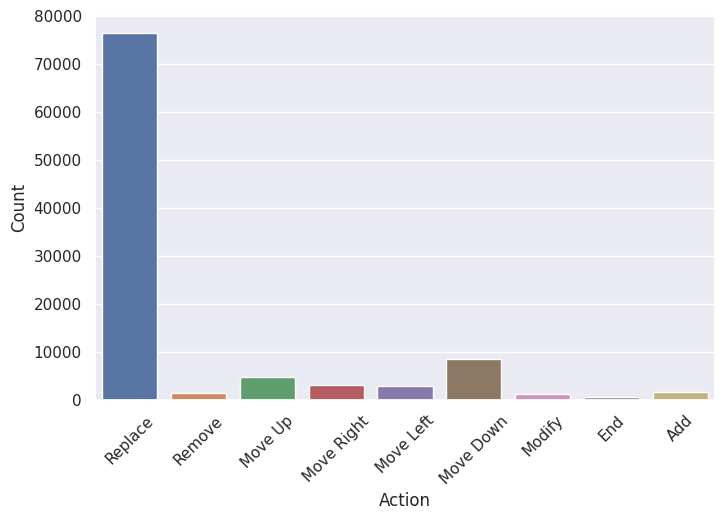

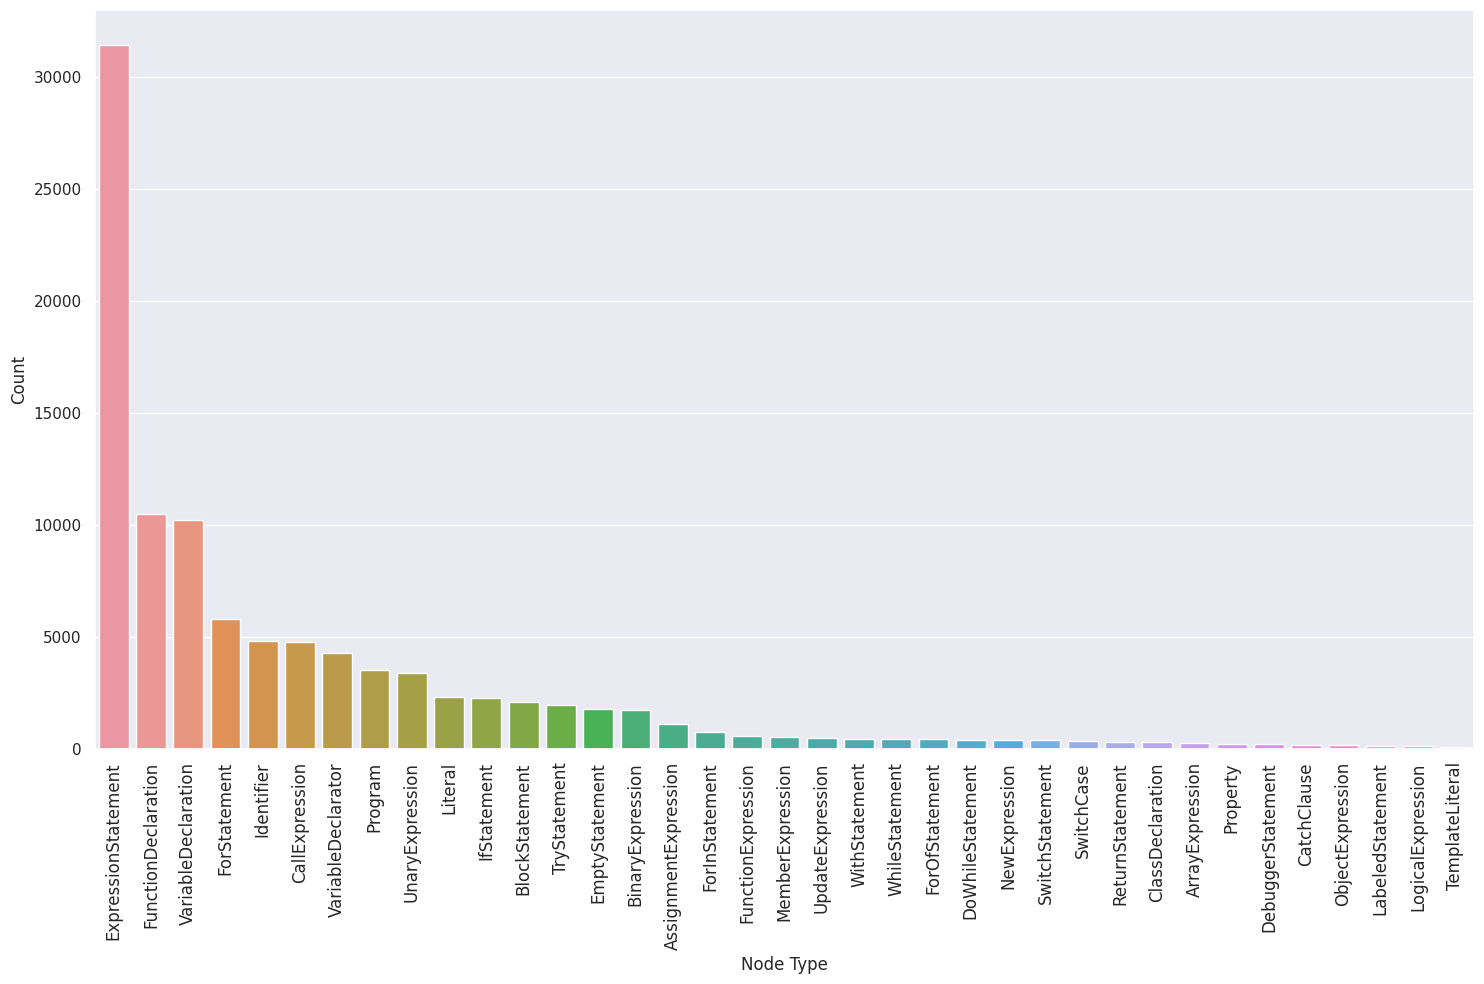

In [242]:
action_fig, action_axs = plt.subplots(
    ncols=len(data_labels), figsize=(8, 5), sharex=True
)
# action_fig.suptitle("Action Distribution")

node_type_fig, node_tyes_axs = plt.subplots(nrows=len(data_labels), figsize=(15, 10))
# node_type_fig.suptitle("Node Type Distribution")

for i, label in enumerate(data_labels):
    episode_actions = [
        item for sublist in run_data[i]["episode_actions"] for item in sublist
    ]
    ep_actions, node_types = zip(*episode_actions)
    action_counts = Counter(ep_actions[-100000:])
    node_type_counts = Counter(node_types[-100000:])

    new_node_type_counts = {}

    for node_type, count in node_type_counts.items():
        if count > 100:
            new_node_type_counts[node_type] = count

    node_type_counts = new_node_type_counts

    action_counts = pd.DataFrame.from_dict(action_counts, orient="index")
    action_counts["name"] = [str(FuzzingAction(i)) for i in action_counts.index]
    action_counts = action_counts.sort_values(by="name", ascending=False)

    print(action_counts)
    print(node_type_counts)

    node_type_counts = pd.DataFrame.from_dict(node_type_counts, orient="index")
    node_type_counts["name"] = node_type_counts.index

    node_type_counts = node_type_counts.sort_values(by=0, ascending=False)

    sns.barplot(x="name", y=0, data=action_counts, ax=action_axs)

    action_axs.set(xlabel="Action", ylabel="Count")
    action_axs.set_xticklabels(action_axs.get_xticklabels(), rotation=45)

    # plt.legend([], [], frameon=False)

    sns.barplot(x="name", y=0, data=node_type_counts, ax=node_tyes_axs)

    node_tyes_axs.set(xlabel="Node Type", ylabel="Count")
    node_tyes_axs.set_xticklabels(
        node_tyes_axs.get_xticklabels(), rotation=90, fontsize=12
    )
    # plt.legend([], [], frameon=False)

plt.tight_layout()

In [246]:
episode_actions = [
    item for sublist in run_data[0]["episode_actions"] for item in sublist
]
expression_counts = Counter(episode_actions[-100000:])

for (action, node_type), count in expression_counts.items():
    if node_type == "ForStatement":
        print(action, count)

4 110
0 5336
3 23
5 71
7 39
6 69
1 96
8 31
2 35


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1093746/897049664.py", line 15, in <module>
    ax=failed_action_axs[i],
       ~~~~~~~~~~~~~~~~~^^^
TypeError: 'Axes' object is not subscriptable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packages/IPython/core/ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
       

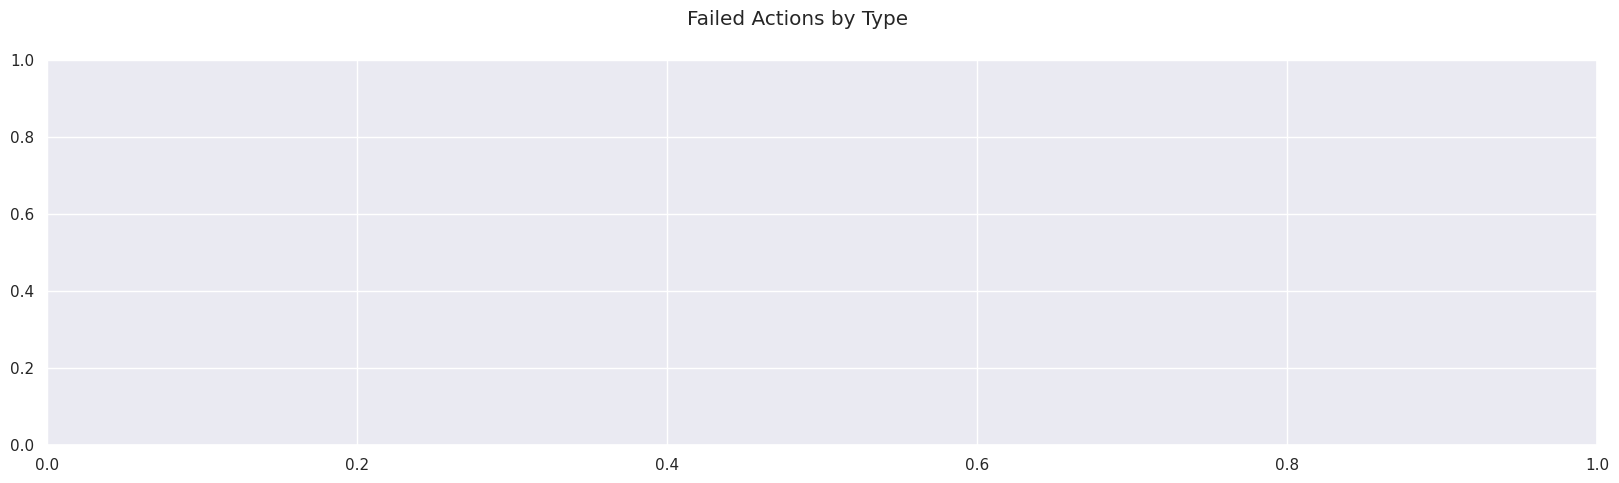

In [226]:
failed_action_fig, failed_action_axs = plt.subplots(
    ncols=len(data_labels), figsize=(20, 5)
)
failed_action_fig.suptitle("Failed Actions by Type")

for i, label in enumerate(data_labels):
    failed_action_counts = Counter(map(lambda x: x[0], run_data[i]["failed_actions"]))
    failed_action_counts = pd.DataFrame(
        failed_action_counts.items(), columns=["action_id", "count"]
    )
    failed_action_counts["name"] = [
        str(FuzzingAction(i)) for i in failed_action_counts["action_id"]
    ]
    failed_action_counts = failed_action_counts.sort_values(by="name", ascending=False)
    sns.barplot(
        x="name",
        y="count",
        data=failed_action_counts,
        ax=failed_action_axs[i],
    )
    failed_action_axs[i].set(xlabel="Action", ylabel="Count", title=f"{label}")
    failed_action_axs[i].set_xticklabels(
        failed_action_axs[i].get_xticklabels(), rotation=45
    )

In [247]:
with open("../data/js-rl/corpus-8.5.pkl", "rb") as f:
    data = pickle.load(f)

/home/pranav/.cache/pypoetry/virtualenvs/js-rl-vfj9GiAe-py3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: FutureWarning: Possible set difference at position 2
  exec(code_obj, self.user_global_ns, self.user_ns)


In [249]:
corpus = data["corpus"]
subtrees = data["subtrees"]
total_coverage = data["total_coverage"]

file_to_node = {state.program.origin_file: state for state in corpus}

print(file_to_node)

smart_interesting_folder = Path("../corpus/interesting/2023-06-19T14:48:.793014")
program_state_files = smart_interesting_folder.rglob("*.ps")
program_states = {file: pickle.load(open(file, "rb")) for file in program_state_files}

import difflib
import tqdm

for file, state in tqdm.tqdm(program_states.items()):
    new_program = state.generate_program_code()
    if new_program is None:
        print(f"File {file} failed to generate program code")
        continue

    if state.program.origin_file not in file_to_node:
        print(f"File {state.program.origin_file} not found")
        continue

    old_program = file_to_node[state.program.origin_file].generate_program_code()

    old_program = "\n".join(["--- Original File ---", old_program])
    new_program = "\n".join(["+++ Modified File +++", new_program])

    diff_generator = difflib.unified_diff(
        old_program.splitlines(keepends=True),
        new_program.splitlines(keepends=True),
    )

    # Write the diff to the output file
    with open(file.with_suffix(".diff"), "w") as f:
        f.writelines(diff_generator)

{'backup-point-bug1315634.js': <rl.program_state.ProgramState object at 0x7ffb3efe70a0>, 'bug1491337.js': <rl.program_state.ProgramState object at 0x7ffb37281600>, 'bug1491350.js': <rl.program_state.ProgramState object at 0x7ffb391bffa0>, 'bug1258301.js': <rl.program_state.ProgramState object at 0x7ffb391bc5e0>, 'callee.js': <rl.program_state.ProgramState object at 0x7ffb391bdd20>, 'bug842316.js': <rl.program_state.ProgramState object at 0x7ffb391be5c0>, 'bug1216140.js': <rl.program_state.ProgramState object at 0x7ffb3c34b3a0>, 'bug877589.js': <rl.program_state.ProgramState object at 0x7ffb3c349c60>, 'bug1054330.js': <rl.program_state.ProgramState object at 0x7ffaf28cb580>, 'getgname-uninitialized-let.js': <rl.program_state.ProgramState object at 0x7ffb41bf21a0>, 'bug847484.js': <rl.program_state.ProgramState object at 0x7ffb14a368c0>, 'accessor-ic-shape-replacement.js': <rl.program_state.ProgramState object at 0x7ffb16eef040>, 'bug881461.js': <rl.program_state.ProgramState object at 0

100%|██████████| 806/806 [00:00<00:00, 980.65it/s] 


In [229]:
# from utils.js_engine import V8Engine
# import pickle

# with open("../data/js-rl/corpus-8.5.pkl", "rb") as f:
#     corpus = pickle.load(f)

In [230]:
# corpus = corpus["corpus"]

In [231]:
# depths = []
# for ps in corpus:
#     ast = ps.program

#     max_depth = 0

#     queue = [(ast, 0)]

#     while queue:
#         node, depth = queue.pop(0)
#         if depth > max_depth:
#             max_depth = depth

#         for child in node.children():
#             queue.append((child, depth + 1))

#     depths.append(max_depth)

In [232]:
# print(sum(depths) / len(depths))

In [233]:
# import tqdm
# from pathlib import Path

# corpus = data["corpus"]
# subtrees = data["subtrees"]
# total_coverage = data["total_coverage"]

# engine = V8Engine(base_path=Path("../"), version="8.5")

# fuzzilli_path = Path("../corpus/interesting/fuzzilli-2")
# files = list(fuzzilli_path.rglob("*.js"))

# # die_path = Path("../corpus/interesting/die-2")
# # files = list(die_path.rglob("*"))

# for file in (bar := tqdm.tqdm(files)):
#     if file.with_suffix(".exec").exists():
#         exec_data = pickle.load(open(file.with_suffix(".exec"), "rb"))
#     else:
#       with open(file, "r") as f:
#         code = f.read()
#         exec_data = engine.execute_text(code)

#       with open(file.with_suffix(".exec"), "wb") as f:
#           pickle.dump(exec_data, f)

#     if exec_data is None:
#         print(f"File {file} failed to execute")
#         continue

#     total_coverage = total_coverage | exec_data.coverage
#     bar.set_postfix({"coverage": total_coverage.coverage()})

In [234]:
# print(total_coverage) #16.19981
# print(data["total_coverage"])

In [235]:
# resume = "2023-06-20T06:37:.270395_baseline"

# total_coverage = data["total_coverage"]
# subtrees = data["subtrees"]
# new_corpus = data["corpus"]

# corpus_path = Path("../corpus/interesting") / resume
# corpus_files = list(corpus_path.rglob("*.js"))

# for file in tqdm.tqdm(corpus_files):
#     if file.with_suffix(".exec").exists():
#         exec_data = pickle.load(open(file.with_suffix(".exec"), "rb"))
#     else:
#       with open(file, "r") as f:
#         code = f.read()
#         exec_data = engine.execute_text(code)
#         with open(file.with_suffix(".exec"), "wb") as f:
#             pickle.dump(exec_data, f)

#     if exec_data is None:
#         print(f"File {file} failed to execute")
#         continue

#     with open(file.with_suffix(".ps"), "rb") as f:
#         program_state = pickle.load(f)

#     total_coverage = exec_data.coverage| total_coverage
#     new_corpus.append(program_state)

# print(total_coverage)

# with open(f"../data/js-rl/corpus-8.5-{resume}.pkl", "wb") as f:
#     pickle.dump({
#         "corpus": new_corpus,
#         "subtrees": subtrees,
#         "total_coverage": total_coverage,
#     }, f)